In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [200]:
advanced_df = pd.read_csv('Assets/Player_Advanced_Filter.csv')
totals_df = pd.read_csv('Assets/Player_Totals_Filter.csv')
contracts_df = pd.read_csv('Assets/NBA_Contracts.csv') 
print(advanced_df.columns)
print(totals_df.columns)


Index(['Season', 'Rank', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'Honors', 'Contract Age', 'Contract_Year_Flag',
       'CY Flag'],
      dtype='object')
Index(['Season', 'Rank', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Trp-Dbl', 'Honors', 'Contract Age', 'Contract_Year_Flag',
       'CY Flag'],
      dtype='object')


In [157]:
merged_df = totals_df.merge(advanced_df.drop(["Age", "Team","Rank", "Pos", "G", "GS", "MP", "Honors", "Contract Age", "Contract_Year_Flag", "CY Flag"], axis=1),
                            on=["Player", "Season"],
                            how="left")

#Lets filter out based on Minutes Played rather than contract length
filtered_merged_df = merged_df[merged_df['MP'] > 50]
print(filtered_merged_df.columns)

Index(['Season', 'Rank', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Trp-Dbl', 'Honors', 'Contract Age', 'Contract_Year_Flag',
       'CY Flag', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')


Text(0, 0.5, 'Mean Value')

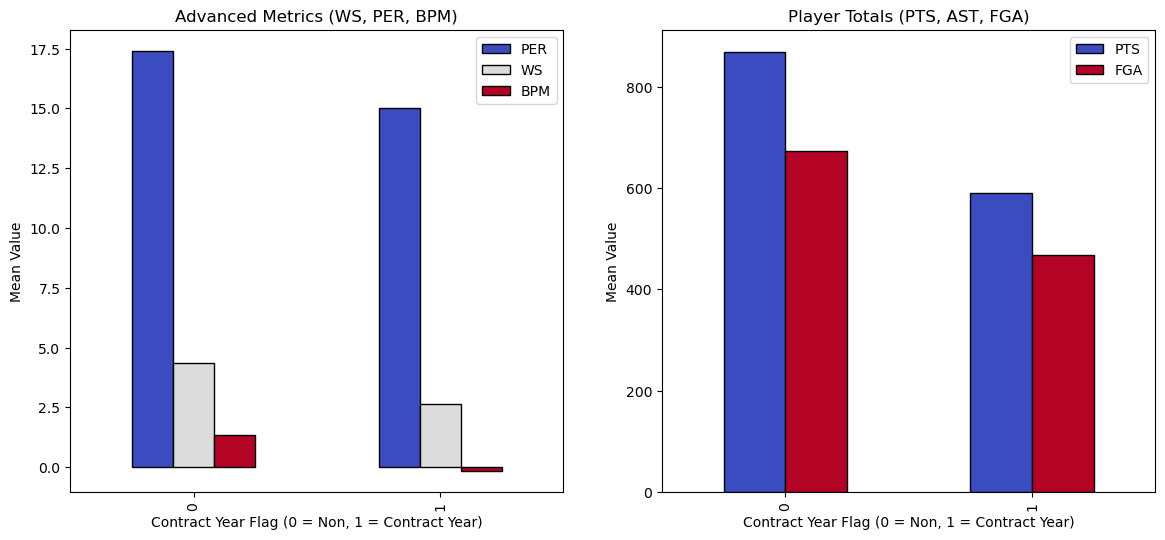

In [159]:
advanced_metrics = ["PER", "WS", "BPM"]
player_metrics = ["PTS","FGA"] 

adv_means = filtered_merged_df.groupby(["CY Flag"])[advanced_metrics].mean()
player_means = filtered_merged_df.groupby(["CY Flag"])[player_metrics].mean()

fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
adv_means.plot(kind="bar", colormap="coolwarm", edgecolor="black", ax=axes[0])
axes[0].set_title("Advanced Metrics (WS, PER, BPM)")
axes[0].set_xlabel("Contract Year Flag (0 = Non, 1 = Contract Year)")
axes[0].set_ylabel("Mean Value")

player_means.plot(kind="bar", colormap="coolwarm", edgecolor="black", ax=axes[1])
axes[1].set_title("Player Totals (PTS, AST, FGA)")
axes[1].set_xlabel("Contract Year Flag (0 = Non, 1 = Contract Year)")
axes[1].set_ylabel("Mean Value")

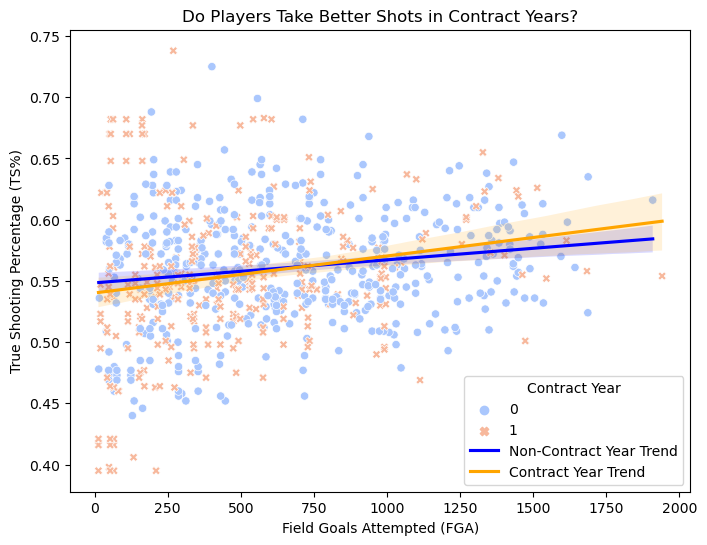

In [160]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_merged_df, x="FGA", y="TS%", hue="CY Flag", style="CY Flag", palette="coolwarm") #create our base scatter plot

#creating linear regression lines to show relation between FGA and TS% 
sns.regplot(data=filtered_merged_df[filtered_merged_df["CY Flag"] == 0], x="FGA", y="TS%", scatter=False, color="blue", label="Non-Contract Year Trend")
sns.regplot(data=filtered_merged_df[filtered_merged_df["CY Flag"] == 1], x="FGA", y="TS%", scatter=False, color="orange", label="Contract Year Trend")


#Add our labels to make it look nice
plt.xlabel("Field Goals Attempted (FGA)")
plt.ylabel("True Shooting Percentage (TS%)")
plt.title("Do Players Take Better Shots in Contract Years?")
plt.legend(title="Contract Year")
plt.show()

In [130]:
# Visualizing if players change their approach to shooting when on their contract years. 
# Are players playing more aggresively/efficiently when on their contract year?
# The trend lines show that low volume scorers actually tend to shoot worse in their contract years whereas high volume scorers shoot slightly better
# This can be seen in both the non-contract years and the contract years but it is exagerated slightly for players in their CY


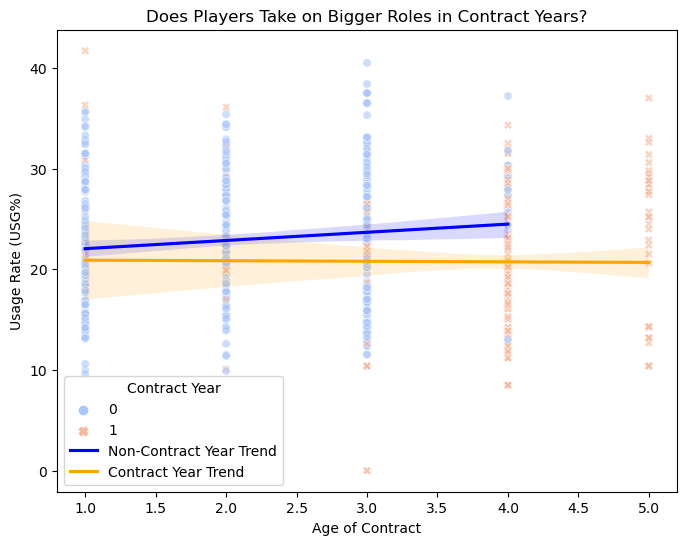

In [162]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=filtered_merged_df, x="Contract Age", y="USG%", hue="CY Flag", style="CY Flag", palette="coolwarm", alpha=0.6)

# Regression trend lines
sns.regplot(data=filtered_merged_df[filtered_merged_df["CY Flag"] == 0], x="Contract Age", y="USG%", scatter=False, color="blue", label="Non-Contract Year Trend")
sns.regplot(data=filtered_merged_df[filtered_merged_df["CY Flag"] == 1], x="Contract Age", y="USG%", scatter=False, color="orange", label="Contract Year Trend")

plt.xlabel("Age of Contract")
plt.ylabel("Usage Rate (USG%)")
plt.title("Does Players Take on Bigger Roles in Contract Years?")
plt.legend(title="Contract Year")
plt.show()

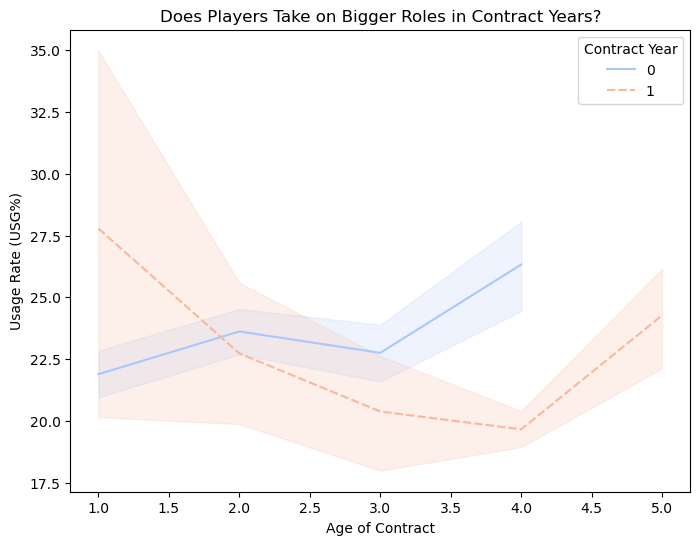

In [201]:
#Same chart as above but linechart instead of scatter with regression
plt.figure(figsize=(8, 6))

sns.lineplot(data=filtered_merged_df, x="Contract Age", y="USG%", hue="CY Flag", style="CY Flag", palette="coolwarm")

# Regression trend lines
#sns.regplot(data=filtered_merged_df[filtered_merged_df["CY Flag"] == 0], x="Contract Age", y="USG%", scatter=False, color="blue", label="Non-Contract Year Trend")
#sns.regplot(data=filtered_merged_df[filtered_merged_df["CY Flag"] == 1], x="Contract Age", y="USG%", scatter=False, color="orange", label="Contract Year Trend")

plt.xlabel("Age of Contract")
plt.ylabel("Usage Rate (USG%)")
plt.title("Does Players Take on Bigger Roles in Contract Years?")
plt.legend(title="Contract Year")
plt.show()

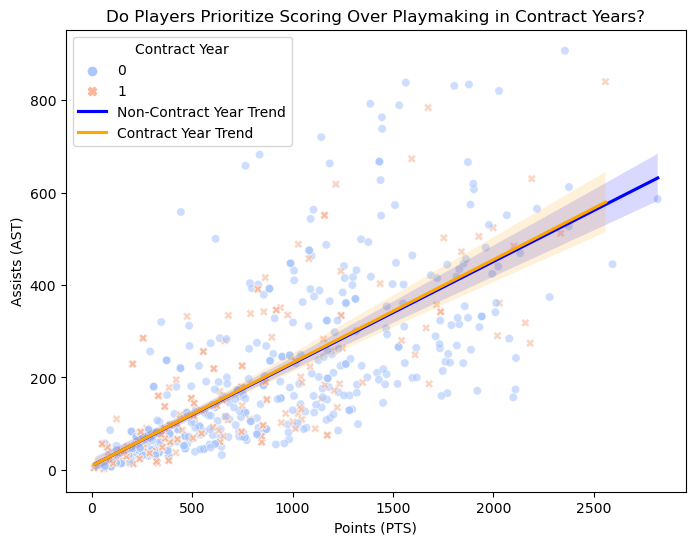

In [164]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_merged_df, x="PTS", y="AST", hue="CY Flag", style="CY Flag", palette="coolwarm", alpha=0.6)

# Regression trend lines
sns.regplot(data=filtered_merged_df[filtered_merged_df["CY Flag"] == 0], x="PTS", y="AST", scatter=False, color="blue", label="Non-Contract Year Trend")
sns.regplot(data=filtered_merged_df[filtered_merged_df["CY Flag"] == 1], x="PTS", y="AST", scatter=False, color="orange", label="Contract Year Trend")

plt.xlabel("Points (PTS)")
plt.ylabel("Assists (AST)")
plt.title("Do Players Prioritize Scoring Over Playmaking in Contract Years?")
plt.legend(title="Contract Year")
plt.show()

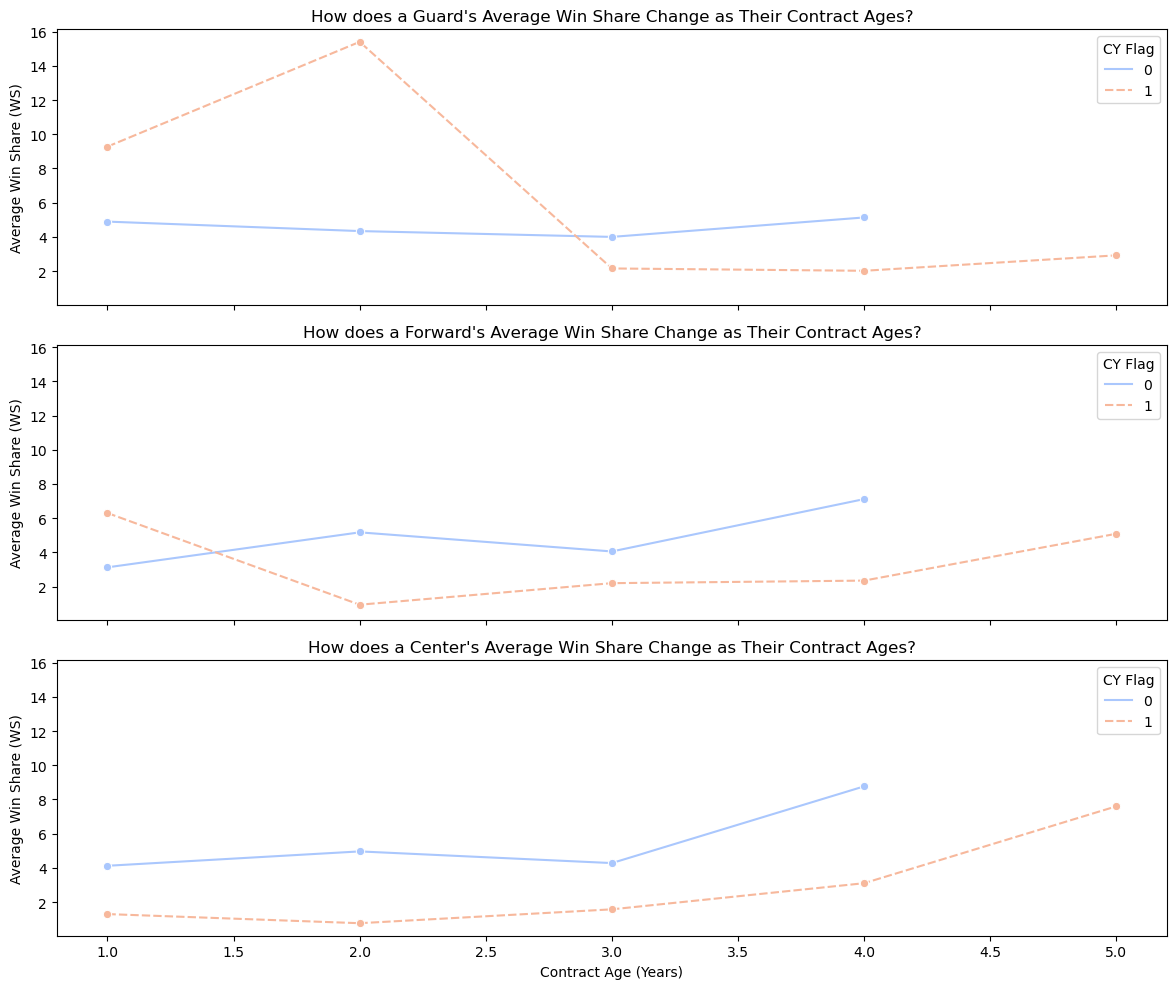

In [199]:
position_map = {
    "PG": "Guard",
    "SG": "Guard",
    "SF": "Forward",
    "PF": "Forward",
    "C": "Center"
}
position_groups = ["Guard", "Forward", "Center"]

# Create new position group column
filtered_merged_df["Position Group"] = filtered_merged_df["Pos"].map(position_map)


fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True, sharey=True)

for i, position in enumerate(position_groups):
    sns.lineplot(data=filtered_merged_df[filtered_merged_df["Position Group"] == position]
                 .groupby(["Contract Age", "CY Flag"]).mean(numeric_only=True).reset_index(),
                 x="Contract Age", y="WS", hue="CY Flag", style="CY Flag", marker="o", palette="coolwarm", ax=axes[i])

    axes[i].set_title(f"How does a {position}'s Average Win Share Change as Their Contract Ages?")
    axes[i].set_xlabel("Contract Age (Years)")
    axes[i].set_ylabel("Average Win Share (WS)")
    axes[i].legend(title="CY Flag")

plt.tight_layout()
plt.show()